In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('output_file.csv')
print(df)

       Store ID      City Sales Channel  Gender Age Group Purchase Time  \
0           658  shenzhen         store  Female     25-29     2021/6/23   
1           146  hangzhou         store  Female     25-29      2021/9/2   
2            70  shenzhen         store    Male      >=60    2021/10/18   
3           658  shenzhen         store  Female     25-29     2021/2/21   
4           229  shenzhen         store    Male     20-24     2021/1/11   
...         ...       ...           ...     ...       ...           ...   
22288       146  hangzhou         store  Female     30-34     2021/7/28   
22289       430   chengdu         store  Female     25-29    2021/10/17   
22290       449     wuhan         store  Female     35-39     2021/10/3   
22291       758  hangzhou         store  Female     20-24     2021/9/14   
22292       616   chengdu         store    Male     30-34      2021/8/4   

      Product Category  Customer Count  Sales Amount  Order Count  \
0        Seasonal_Item        

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22293 entries, 0 to 22292
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Store ID          22293 non-null  int64  
 1   City              22293 non-null  object 
 2   Sales Channel     22293 non-null  object 
 3   Gender            22293 non-null  object 
 4   Age Group         22293 non-null  object 
 5   Purchase Time     22293 non-null  object 
 6   Product Category  22293 non-null  object 
 7   Customer Count    22293 non-null  int64  
 8   Sales Amount      22293 non-null  float64
 9   Order Count       22293 non-null  int64  
 10  Purchase Count    22293 non-null  int64  
 11  Product Cost      22293 non-null  int64  
 12  Unit Price        22293 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 2.2+ MB


In [6]:
df.describe()

,Store ID,Customer Count,Sales Amount,Order Count,Purchase Count,Product Cost,Unit Price
count,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000
mean,335.391558,1.629480,159.531371,1.651998,1.858072,46.124658,84.279998
std,230.236167,1.785605,276.254066,1.861480,2.347301,19.124347,46.314296
min,19.000000,1.000000,-0.660000,1.000000,1.000000,9.000000,0.000000
25%,142.000000,1.000000,64.000000,1.000000,1.000000,49.000000,56.000000
50%,315.000000,1.000000,99.000000,1.000000,1.000000,49.000000,79.000000
75%,480.000000,2.000000,175.000000,2.000000,2.000000,49.000000,99.000000
max,831.000000,58.000000,12538.000000,65.000000,84.000000,99.000000,299.000000


In [7]:
# Sales amount should not negative: -0.660000,remove the outliner and store the correct data.
df=df[df['Sales Amount']>0]
df.describe()

,Store ID,Customer Count,Sales Amount,Order Count,Purchase Count,Product Cost,Unit Price
count,22262.000000,22262.000000,22262.000000,22262.000000,22262.000000,22262.000000,22262.000000
mean,335.486614,1.630357,159.753549,1.652906,1.859222,46.127841,84.397359
std,230.371454,1.786694,276.382135,1.862617,2.348723,19.120825,46.239547
min,19.000000,1.000000,10.000000,1.000000,1.000000,9.000000,10.000000
25%,142.000000,1.000000,66.000000,1.000000,1.000000,49.000000,56.000000
50%,315.000000,1.000000,99.000000,1.000000,1.000000,49.000000,79.000000
75%,480.000000,2.000000,175.000000,2.000000,2.000000,49.000000,99.000000
max,831.000000,58.000000,12538.000000,65.000000,84.000000,99.000000,299.000000


In [8]:
# Data type description analysis
df.select_dtypes('object').describe()

,City,Sales Channel,Gender,Age Group,Purchase Time,Product Category
count,22262,22262,22262,22262,22262,22262
unique,10,2,3,11,303,9
top,shenzhen,store,Female,30-34,2021/9/16,Tshirt
freq,4364,18373,14186,4423,101,10598


In [9]:
for i in df.select_dtypes('object'):
    print(i,df[i].unique())

City ['shenzhen' 'hangzhou' 'wuhan' 'beijing' 'chongqing' 'xian' 'guangzhou'
 'nanjing' 'shanghai' 'chengdu']
Sales Channel ['store' 'online']
Gender ['Female' 'Male' 'Unkown']
Age Group ['25-29' '>=60' '20-24' '35-39' '30-34' '45-49' '50-54' '40-44' 'Unkown'
 '55-59' '<20']
Purchase Time ['2021/6/23' '2021/9/2' '2021/10/18' '2021/2/21' '2021/1/11' '2021/8/6'
 '2021/3/6' '2021/7/28' '2021/4/11' '2021/8/14' '2021/1/31' '2021/3/18'
 '2021/2/9' '2021/2/12' '2021/4/5' '2021/10/2' '2021/8/18' '2021/2/25'
 '2021/3/1' '2021/1/22' '2021/8/31' '2021/10/29' '2021/1/2' '2021/3/27'
 '2021/10/5' '2021/6/18' '2021/3/5' '2021/9/24' '2021/9/11' '2021/3/14'
 '2021/9/25' '2021/6/8' '2021/5/30' '2021/7/7' '2021/5/6' '2021/1/30'
 '2021/8/2' '2021/3/28' '2021/4/29' '2021/3/26' '2021/7/10' '2021/8/3'
 '2021/8/25' '2021/6/20' '2021/10/3' '2021/8/29' '2021/3/30' '2021/2/8'
 '2021/3/15' '2021/3/10' '2021/3/25' '2021/8/5' '2021/10/6' '2021/8/17'
 '2021/1/24' '2021/4/7' '2021/3/4' '2021/2/13' '2021/4/2' '2021/10


a. Data cleaning
-The Unkown part of gender is filled in as the mode of gender
-The Unkown part of the age group is filled in as the mode


In [10]:
df['Gender'].mode()

0    Female
Name: Gender, dtype: object

In [11]:
df['Gender'][df['Gender']=='Unkown']='Female'

In [12]:
df['Age Group'].mode()

0    30-34
Name: Age Group, dtype: object

In [13]:
df.loc[df['Age Group']=='Unkown','Age Group']='30-34'

In [14]:
df['Age Group'].unique()

array(['25-29', '>=60', '20-24', '35-39', '30-34', '45-49', '50-54',
       '40-44', '55-59', '<20'], dtype=object)


b. Descriptive analysis: numerical detailed analysis

1. Analyze the range of single unit cost
2. Cost analysis of different products, which product has the highest cost and which has the lowest cost
3. Analyze the selling price of a single product and what range it is in
4. Analyze the profit situation of different products, which product is more profitable and which one is selling at a loss

In [15]:
# Remove the unknow values and fill in as the mode

for i in df.select_dtypes('object'):
    print(i,df[i].unique())

City ['shenzhen' 'hangzhou' 'wuhan' 'beijing' 'chongqing' 'xian' 'guangzhou'
 'nanjing' 'shanghai' 'chengdu']
Sales Channel ['store' 'online']
Gender ['Female' 'Male']
Age Group ['25-29' '>=60' '20-24' '35-39' '30-34' '45-49' '50-54' '40-44' '55-59'
 '<20']
Purchase Time ['2021/6/23' '2021/9/2' '2021/10/18' '2021/2/21' '2021/1/11' '2021/8/6'
 '2021/3/6' '2021/7/28' '2021/4/11' '2021/8/14' '2021/1/31' '2021/3/18'
 '2021/2/9' '2021/2/12' '2021/4/5' '2021/10/2' '2021/8/18' '2021/2/25'
 '2021/3/1' '2021/1/22' '2021/8/31' '2021/10/29' '2021/1/2' '2021/3/27'
 '2021/10/5' '2021/6/18' '2021/3/5' '2021/9/24' '2021/9/11' '2021/3/14'
 '2021/9/25' '2021/6/8' '2021/5/30' '2021/7/7' '2021/5/6' '2021/1/30'
 '2021/8/2' '2021/3/28' '2021/4/29' '2021/3/26' '2021/7/10' '2021/8/3'
 '2021/8/25' '2021/6/20' '2021/10/3' '2021/8/29' '2021/3/30' '2021/2/8'
 '2021/3/15' '2021/3/10' '2021/3/25' '2021/8/5' '2021/10/6' '2021/8/17'
 '2021/1/24' '2021/4/7' '2021/3/4' '2021/2/13' '2021/4/2' '2021/10/27'
 '2021/3/31' 

<Axes: ylabel='Product Cost'>

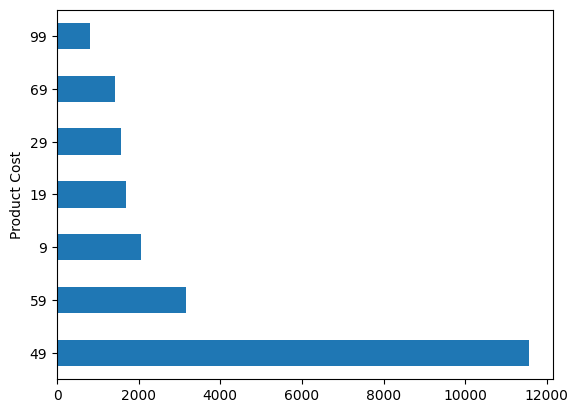

In [16]:
# 1.Analyze the range of the overall single piece cost
df['Product Cost'].value_counts().plot(kind='barh')

In [17]:
# 2.Cost analysis of different products, which product has the highest cost and which has the lowest cost
df['Product Category'].unique()

df[df['Product Category']=='Seasonal_Item']['Product Cost'].mean()


df.groupby('Product Category')['Product Cost'].mean()

Product Category
Accessory        29.0
Jeans            69.0
Pants            19.0
Seasonal_Item    59.0
Skrit            59.0
Socks             9.0
Sport            49.0
Sweater          99.0
Tshirt           49.0
Name: Product Cost, dtype: float64

<Axes: ylabel='Density'>

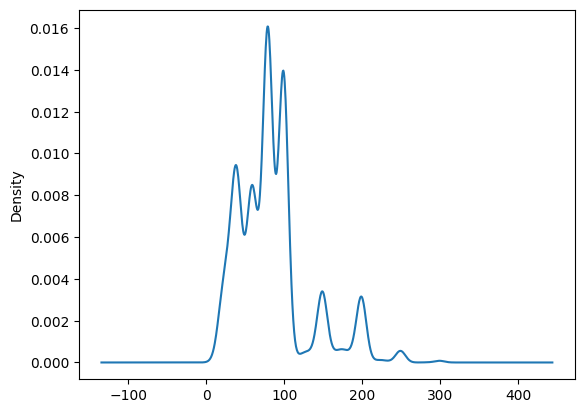

In [18]:
# 3.Analyze the selling price of a single product and within what range
df['Unit Price'].plot(kind='kde')


In [19]:
# 4. Analyze the profit situation of different products, which product is more profitable and which one is selling at a loss
df['Profit']=df['Unit Price']-df['Product Cost']

df.groupby('Product Category')['Profit'].describe()



,count,mean,std,min,25%,50%,75%,max
Product Category,,,,,,,,
Accessory,1571.0,79.713558,51.420578,0.0,50.0,69.0,120.0,270.0
Jeans,1410.0,21.946099,60.357075,-56.0,-30.0,-10.0,80.0,130.0
Pants,1691.0,19.594323,8.538521,-9.0,14.0,20.0,21.0,60.0
Seasonal_Item,2534.0,36.782952,48.643001,-46.0,-1.0,20.0,80.0,140.0
Skrit,629.0,79.961844,50.560664,-49.0,32.0,90.0,140.0,140.0
Socks,2048.0,30.787598,23.383578,1.0,13.0,18.0,50.0,70.0
Sport,975.0,19.302564,46.240929,-31.0,-11.0,-10.0,50.0,200.0
Sweater,806.0,81.599256,50.425686,-86.0,50.0,100.0,100.0,150.0
Tshirt,10598.0,35.053972,25.358055,-35.0,27.0,30.0,50.0,200.0


c. Categorical data analysis

1.which city has the highest turnover?

2.How many sales channels are there? What are the main channels? Which city is doing well in online business?

3.Which is the best-selling product(with the highest turnover)

4.User analysis (finding Uniqlo’s main consumer groups)

5.Analyze the change trend of monthly sales amount 

In [20]:
#1.Which cities are there and which city has the highest turnover.
df['City'].unique()



array(['shenzhen', 'hangzhou', 'wuhan', 'beijing', 'chongqing', 'xian',
       'guangzhou', 'nanjing', 'shanghai', 'chengdu'], dtype=object)

In [21]:
df.groupby('City')['Sales Amount'].sum().sort_values(ascending=False)

City
shenzhen     733123.68
wuhan        589778.44
hangzhou     589518.49
shanghai     389821.73
guangzhou    318124.49
chongqing    263492.65
xian         210774.62
chengdu      208189.86
beijing      130458.62
nanjing      123150.93
Name: Sales Amount, dtype: float64

In [22]:
#2.How many sales channels are there? What are the main channels? Which city is doing well in online business?
df['Sales Channel'].unique()

array(['store', 'online'], dtype=object)

In [23]:
df['Sales Channel'].value_counts()

Sales Channel
store     18373
online     3889
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


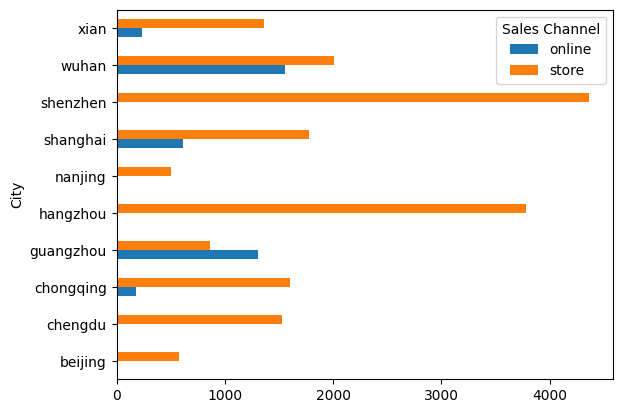

In [24]:
cross_tab = pd.crosstab(index=df['City'], columns=df['Sales Channel']).plot(kind='barh')

print(cross_tab)

<Axes: ylabel='Product Category'>

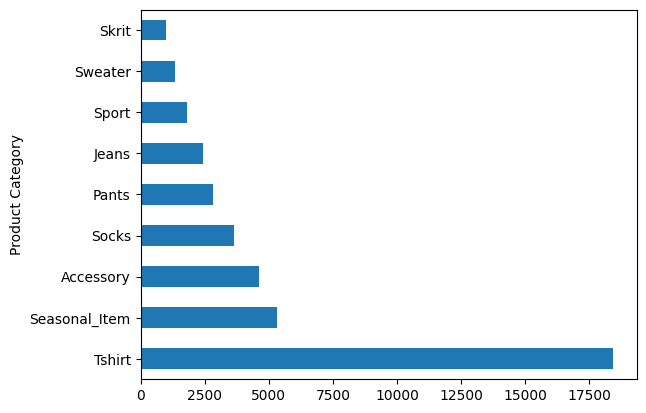

In [25]:
# 3.Which is the best-selling product
df.groupby('Product Category')['Purchase Count'].sum().sort_values(ascending=False).plot(kind='barh')

In [26]:
df.groupby('Product Category')['Sales Amount'].sum().sort_values(ascending=False)

Product Category
Tshirt           1538744.84
Seasonal_Item     590664.88
Accessory         444685.15
Jeans             246127.48
Sweater           245630.80
Skrit             137302.78
Socks             127731.36
Sport             118060.34
Pants             107485.88
Name: Sales Amount, dtype: float64

<Axes: ylabel='Age Group'>

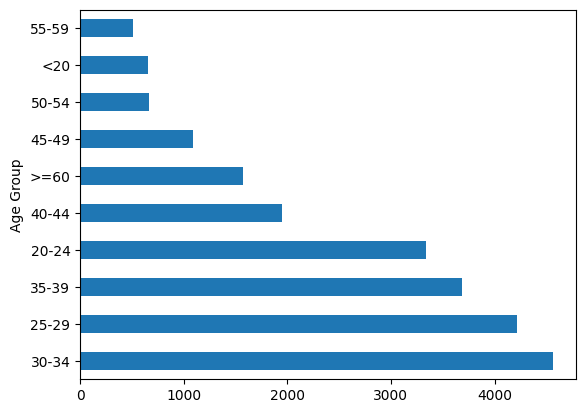

In [27]:
 # 4. User analysis, Uniqlo’s main consumer groups: 20-40岁
df['Age Group'].value_counts().plot(kind='barh')

<Axes: xlabel='Gender'>

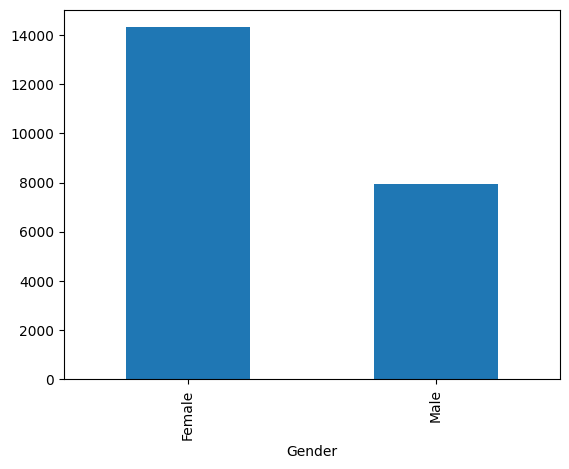

In [28]:
df['Gender'].value_counts().plot(kind='bar')

In [29]:
# 5.Analyze the change trend of monthly sales amount for recent year

# Transfer to a proper date type
df['Purchase Time']=pd.to_datetime(df['Purchase Time'])

<Axes: xlabel='Month'>

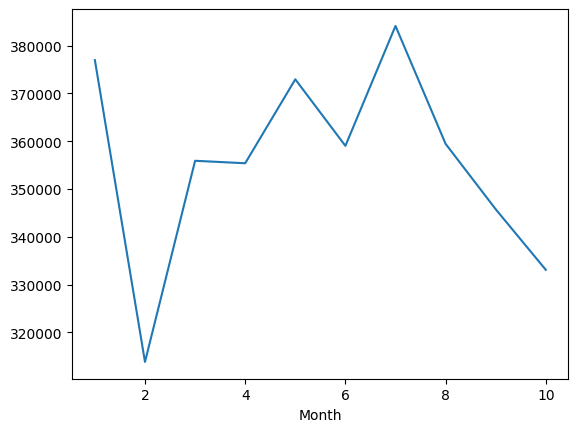

In [30]:
df['Month']=df['Purchase Time'].dt.month
df

df.groupby('Month')['Sales Amount'].sum().plot()

d. After analyzing the trend, make a sales goal for every store.

1.Define an overall goal for November, which should be improved by 20% based on October.
2.The target amount for each city is derived based on its sales contribution rate.
3.Perdict the target sales amount of each store based on the sales contribution rate of each store.

-Sales contribution rate: total sales in each city from January to October / total sales
-Sales contribution rate of each store: Total sales of each store from January to October/total sales of the city 

In [31]:
# Total sales amount at October
sale_Oct=df['Sales Amount'][df.Month==10].sum()
print(sale_Oct)

333094.43000000005


In [32]:
# Target sales amount at December
target_Dec=sale_Oct*1.2
print(target_Dec)

399713.31600000005


In [33]:
# Sales contribution rate by cities
Sales_contribution_rate_by_cities = df.groupby('City')['Sales Amount'].sum()/df['Sales Amount'].sum()
print(Sales_contribution_rate_by_cities)

City
beijing      0.036682
chengdu      0.058539
chongqing    0.074089
guangzhou    0.089450
hangzhou     0.165761
nanjing      0.034628
shanghai     0.109610
shenzhen     0.206140
wuhan        0.165834
xian         0.059266
Name: Sales Amount, dtype: float64


In [34]:
# Target sales amount for each city in November
city_tar=target_Dec*Sales_contribution_rate_by_cities
print(city_tar)

City
beijing      14662.455366
chengdu      23398.795187
chongqing    29614.365228
guangzhou    35754.526112
hangzhou     66256.936849
nanjing      13841.132264
shanghai     43812.694912
shenzhen     82396.956487
wuhan        66286.153050
xian         23689.300546
Name: Sales Amount, dtype: float64


In [35]:
# Total sales for each city
total_sales_by_city=df.groupby(by=['City',
              'Store ID'],
          as_index=False)['Sales Amount'].sum()
print(total_sales_by_city)

       City  Store ID  Sales Amount
0   beijing        21     130458.62
1   chengdu        98      41145.35
2   chengdu       360      48392.83
3   chengdu       430      34697.97
4   chengdu       605      37449.81
..      ...       ...           ...
59     xian       336      37082.68
60     xian       429      36368.15
61     xian       442      37276.34
62     xian       648      36732.90
63     xian       802      33226.54

[64 rows x 3 columns]


In [36]:
(city_sales)=df.groupby('City'
           ,as_index=False)['Sales Amount'].sum()
print(city_sales)

        City  Sales Amount
0    beijing     130458.62
1    chengdu     208189.86
2  chongqing     263492.65
3  guangzhou     318124.49
4   hangzhou     589518.49
5    nanjing     123150.93
6   shanghai     389821.73
7   shenzhen     733123.68
8      wuhan     589778.44
9       xian     210774.62


In [37]:

# Sales_contribution_rate_by_stores
total_sales_by_city['Sales_contribution_rate_by_stores']=total_sales_by_city.apply(lambda x:x[2]/(city_sales['Sales Amount'][x[0]==city_sales['City']]).sum()
                                   ,axis=1)
print(total_sales_by_city['Sales_contribution_rate_by_stores'])


0     1.000000
1     0.197634
2     0.232446
3     0.166665
4     0.179883
        ...   
59    0.175935
60    0.172545
61    0.176854
62    0.174276
63    0.157640
Name: Sales_contribution_rate_by_stores, Length: 64, dtype: float64


In [38]:
#shanghai as an example
#print(total_sales_by_city[total_sales_by_city['City']=='shanghai']['Sales_contribution_rate_by_stores'].sum())

In [39]:
print(total_sales_by_city)

       City  Store ID  Sales Amount  Sales_contribution_rate_by_stores
0   beijing        21     130458.62                           1.000000
1   chengdu        98      41145.35                           0.197634
2   chengdu       360      48392.83                           0.232446
3   chengdu       430      34697.97                           0.166665
4   chengdu       605      37449.81                           0.179883
..      ...       ...           ...                                ...
59     xian       336      37082.68                           0.175935
60     xian       429      36368.15                           0.172545
61     xian       442      37276.34                           0.176854
62     xian       648      36732.90                           0.174276
63     xian       802      33226.54                           0.157640

[64 rows x 4 columns]


Summary the results:

In [40]:
# 1.Get the target sales of each city in November
print(city_tar)

City
beijing      14662.455366
chengdu      23398.795187
chongqing    29614.365228
guangzhou    35754.526112
hangzhou     66256.936849
nanjing      13841.132264
shanghai     43812.694912
shenzhen     82396.956487
wuhan        66286.153050
xian         23689.300546
Name: Sales Amount, dtype: float64


In [41]:
# 2.Get the target sales of each store in November
total_sales_by_city['target_sales_each_store_Nov']=total_sales_by_city.apply(lambda x:x[3]*city_tar.values[x[0]==city_tar.index].sum(),
               axis=1)

total_sales_by_city[total_sales_by_city['City']=='shanghai']['target_sales_each_store_Nov'].sum()

43812.69491163824

In [42]:
# 3.The best-selling product in each store
group_purchases=df.groupby(by=['City',
              'Store ID',
              'Product Category'],
          as_index=False).agg({'Purchase Count':'sum',
                              'Unit Price':'mean'})
print(group_purchases)

        City  Store ID Product Category  Purchase Count  Unit Price
0    beijing        21        Accessory             138  124.604651
1    beijing        21            Jeans              46   91.280000
2    beijing        21            Pants              87   37.600000
3    beijing        21    Seasonal_Item             188   95.452055
4    beijing        21            Skrit              27  123.642857
..       ...       ...              ...             ...         ...
571     xian       802            Skrit               6  162.333333
572     xian       802            Socks              26   36.800000
573     xian       802            Sport               8   42.666667
574     xian       802          Sweater              13  160.636364
575     xian       802           Tshirt             216   83.819549

[576 rows x 5 columns]


In [47]:
group_purchases['Rank']=group_purchases.groupby(by=['City','Store ID'])['Purchase Count'].rank(method='first',ascending=False)
print(group_purchases)

        City  Store ID Product Category  Purchase Count  Unit Price  Rank
0    beijing        21        Accessory             138  124.604651   3.0
1    beijing        21            Jeans              46   91.280000   6.0
2    beijing        21            Pants              87   37.600000   5.0
3    beijing        21    Seasonal_Item             188   95.452055   2.0
4    beijing        21            Skrit              27  123.642857   9.0
..       ...       ...              ...             ...         ...   ...
571     xian       802            Skrit               6  162.333333   9.0
572     xian       802            Socks              26   36.800000   4.0
573     xian       802            Sport               8   42.666667   8.0
574     xian       802          Sweater              13  160.636364   6.0
575     xian       802           Tshirt             216   83.819549   1.0

[576 rows x 6 columns]


In [49]:
best_selling=group_purchases[group_purchases['Rank']==1]
print(best_selling)

        City  Store ID Product Category  Purchase Count  Unit Price  Rank
8    beijing        21           Tshirt             800   86.772109   1.0
17   chengdu        98           Tshirt             248   86.472727   1.0
26   chengdu       360           Tshirt             245   80.062500   1.0
35   chengdu       430           Tshirt             211   84.007634   1.0
44   chengdu       605           Tshirt             195   84.953846   1.0
..       ...       ...              ...             ...         ...   ...
539     xian       336           Tshirt             162   80.495238   1.0
548     xian       429           Tshirt             216   81.701389   1.0
557     xian       442           Tshirt             199   86.864286   1.0
566     xian       648           Tshirt             226   80.883562   1.0
575     xian       802           Tshirt             216   83.819549   1.0

[64 rows x 6 columns]


In [51]:
best_selling.groupby('City')['Unit Price'].mean()

City
beijing      86.772109
chengdu      83.946496
chongqing    83.933438
guangzhou    84.083385
hangzhou     82.461725
nanjing      83.730612
shanghai     83.359268
shenzhen     84.716542
wuhan        85.495393
xian         84.134828
Name: Unit Price, dtype: float64